Data Scientist Workshop - ex.2.2 - Adam Trentowski, 162602

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline

In [14]:
data = pd.read_csv('D:/Projekty/DataScientistWorkshop/lab_02/files/VLagun_Rotif_Basins.csv')

In [15]:
data.head()

,Anureopsis fissa,Ascomorpha saltans,Asplanchna priodonta,Brachionus angularis,Brachionus calyciflorus calyciflorus,Brachionus calyciflorus f.amphiceros,Brachionus calyciflorus spinosus,Brachionus urceolaris,Brachionus calyciflorus f.anureiformis,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Polyarthra vulgaris,Polyarthra platyptera,Pompholyx sp.,Synchaeta sp.,Trichocerca pusilla,Trichocerca similis,Basin
0,0.0000,0.0068,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.3152,0.8920,0.2714,0.0000,0.0313,0.0,0.0000,0.0000,0.0045,0.0009,0
1,0.0003,0.0000,0.0556,0.0000,0.0179,0.0,0.0,0.0,0.0,0.0769,0.0640,0.0464,0.0000,0.0111,0.0,0.0000,0.0437,0.0041,0.0020,0
2,0.0001,0.0000,0.0014,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0466,0.0120,0.0044,0.0000,0.0000,0.0,0.0001,0.0000,0.0000,0.0000,0
3,0.0001,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0313,0.0079,0.0040,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0
4,0.0001,0.0000,0.0000,0.0003,0.0000,0.0,0.0,0.0,0.0,0.0491,0.0143,0.0019,0.0026,0.0000,0.0,0.0001,0.0000,0.0000,0.0000,0


In [16]:
data.dropna(inplace=True)  # Drop null values
data.head()

,Anureopsis fissa,Ascomorpha saltans,Asplanchna priodonta,Brachionus angularis,Brachionus calyciflorus calyciflorus,Brachionus calyciflorus f.amphiceros,Brachionus calyciflorus spinosus,Brachionus urceolaris,Brachionus calyciflorus f.anureiformis,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Polyarthra vulgaris,Polyarthra platyptera,Pompholyx sp.,Synchaeta sp.,Trichocerca pusilla,Trichocerca similis,Basin
0,0.0000,0.0068,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.3152,0.8920,0.2714,0.0000,0.0313,0.0,0.0000,0.0000,0.0045,0.0009,0
1,0.0003,0.0000,0.0556,0.0000,0.0179,0.0,0.0,0.0,0.0,0.0769,0.0640,0.0464,0.0000,0.0111,0.0,0.0000,0.0437,0.0041,0.0020,0
2,0.0001,0.0000,0.0014,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0466,0.0120,0.0044,0.0000,0.0000,0.0,0.0001,0.0000,0.0000,0.0000,0
3,0.0001,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0313,0.0079,0.0040,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0
4,0.0001,0.0000,0.0000,0.0003,0.0000,0.0,0.0,0.0,0.0,0.0491,0.0143,0.0019,0.0026,0.0000,0.0,0.0001,0.0000,0.0000,0.0000,0


Prepare X and Y

In [17]:
X = pd.get_dummies(data)
X.drop(['Basin'], inplace=True, axis=1)
y = data['Basin']

In [18]:
X

,Anureopsis fissa,Ascomorpha saltans,Asplanchna priodonta,Brachionus angularis,Brachionus calyciflorus calyciflorus,Brachionus calyciflorus f.amphiceros,Brachionus calyciflorus spinosus,Brachionus urceolaris,Brachionus calyciflorus f.anureiformis,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Polyarthra vulgaris,Polyarthra platyptera,Pompholyx sp.,Synchaeta sp.,Trichocerca pusilla,Trichocerca similis
0,0.0000,0.0068,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,1.3152,0.8920,0.2714,0.0000,0.0313,0.0000,0.0000,0.0000,0.0045,0.0009
1,0.0003,0.0000,0.0556,0.0000,0.0179,0.0000,0.0,0.0,0.0000,0.0769,0.0640,0.0464,0.0000,0.0111,0.0000,0.0000,0.0437,0.0041,0.0020
2,0.0001,0.0000,0.0014,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0466,0.0120,0.0044,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000
3,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0313,0.0079,0.0040,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0001,0.0000,0.0000,0.0003,0.0000,0.0000,0.0,0.0,0.0000,0.0491,0.0143,0.0019,0.0026,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.0002,0.0000,0.0530,0.0576,0.0000,0.0329,0.0,0.0,0.0000,0.1651,0.1410,0.0010,0.0049,0.0000,0.0007,0.0060,0.0045,0.0003,0.0010
151,0.0000,0.0000,0.1325,0.1083,0.0306,0.2261,0.0,0.0,0.0388,0.0550,0.0569,0.0016,0.0066,0.0000,0.0000,0.0033,0.0241,0.0002,0.0001
152,0.0001,0.0000,0.0833,0.0809,0.0038,0.1058,0.0,0.0,0.0324,0.2819,0.0941,0.0016,0.0242,0.0000,0.0000,0.0067,0.0318,0.0004,0.0009
153,0.0000,0.0000,0.0007,0.0031,0.0127,0.0000,0.0,0.0,0.0000,0.0127,0.0188,0.0033,0.0018,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
150    1
151    1
152    1
153    1
154    1
Name: Basin, Length: 155, dtype: int64

In [20]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=16)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (116, 19)
Shape of X_test: (39, 19)


In [21]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [22]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[20,  3],
       [15,  1]], dtype=int64)

Visualization

Text(0.5, 427.9555555555555, 'Predicted label')

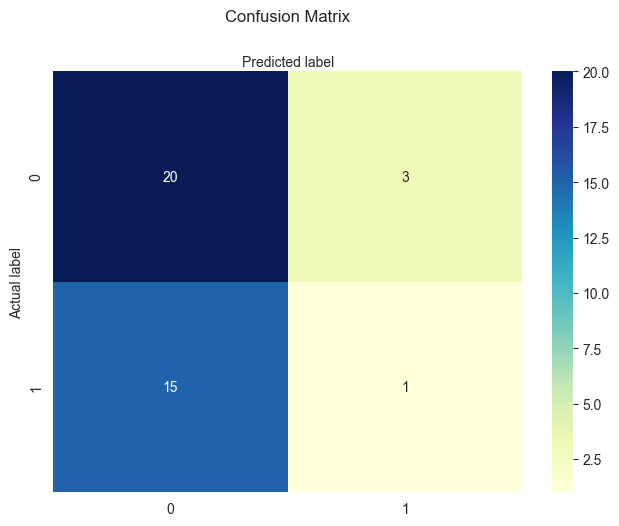

In [23]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Model Evaluation

In [26]:
target_names = ['Sea water', 'Land water']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Sea water       0.57      0.87      0.69        23
  Land water       0.25      0.06      0.10        16

    accuracy                           0.54        39
   macro avg       0.41      0.47      0.39        39
weighted avg       0.44      0.54      0.45        39


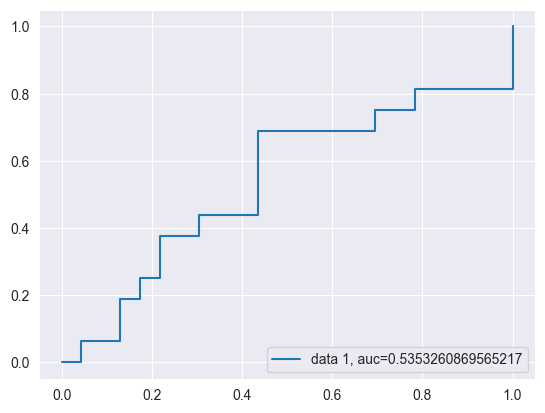

In [25]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='data 1, auc=' + str(auc))
plt.legend(loc=4)
plt.show()